In [1]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.tree import DecisionTreeClassifier

In [80]:
from sklearn.preprocessing import LabelEncoder

In [28]:
import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
!pip install mljar-supervised

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.6 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervised-0.11.5-py3-none-any.whl size=147060 sha256=717e7a5d69c5e77b64be68c6324eedb324cc85381d819cd496621103f74eb957
  Stored in directory: /root/.cache/pip/whe

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
!unzip -qq "/content/gdrive/MyDrive/건설오일기계.zip"

In [89]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [90]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [91]:
train.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [92]:
test.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN'],
      dtype='object')

In [93]:
train_real = pd.DataFrame()

In [95]:
train.drop(labels='ID',axis=1,inplace=True)

In [96]:
test.drop(labels='ID',axis=1,inplace=True)

In [97]:
for i in test.columns:
  train_real[i] = 0

In [98]:
train_real['Y_LABEL'] = train['Y_LABEL']

In [99]:
for i in test.columns:
  if i in train.columns:
    train_real[i] = train[i]
  else:
    pass

In [100]:
train_real

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,Y_LABEL
0,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


In [101]:
test

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


<Axes: >

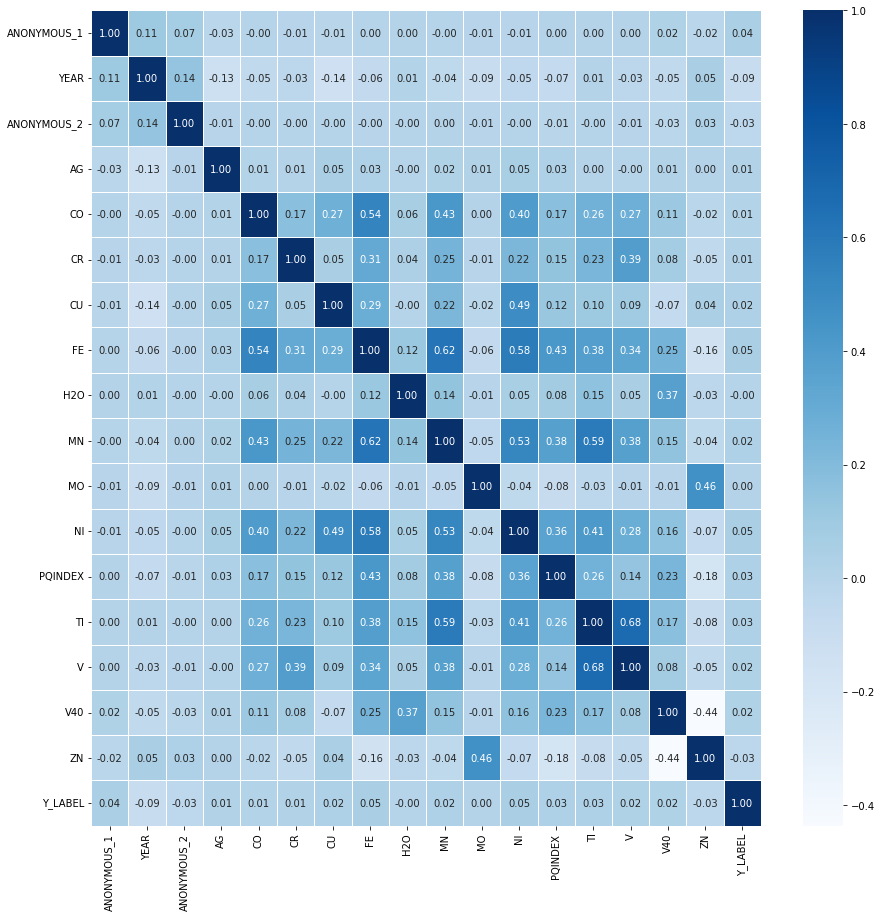

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train_real.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [81]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting req

In [104]:
train_cp = train_real.copy()

In [83]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import catboost
import xgboost

In [105]:
train_cp

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,Y_LABEL
0,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


In [106]:
from pycaret import classification

In [107]:
classification_setup = classification.setup(data=train_cp, target='Y_LABEL',fold_strategy='stratifiedkfold')

,Description,Value
0,Session id,1974
1,Target,Y_LABEL
2,Target type,Binary
3,Original data shape,"(14095, 19)"
4,Transformed data shape,"(14095, 22)"
5,Transformed train set shape,"(9866, 22)"
6,Transformed test set shape,"(4229, 22)"
7,Numeric features,17
8,Categorical features,1
9,Preprocess,True


In [110]:
from sklearn.metrics import f1_score

def f1_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

In [114]:
top5_model = classification.compare_models(fold = 5, round = 3, sort = 'f1', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.462,0.512,0.570,0.086,0.144,0.003,0.015,0.144
dt,Decision Tree Classifier,0.845,0.530,0.151,0.134,0.142,0.057,0.057,0.172
nb,Naive Bayes,0.716,0.572,0.270,0.098,0.114,0.018,0.021,0.134
xgboost,Extreme Gradient Boosting,0.911,0.663,0.034,0.321,0.062,0.046,0.081,1.364
svm,SVM - Linear Kernel,0.746,0.000,0.206,0.038,0.050,0.003,0.002,0.156
lightgbm,Light Gradient Boosting Machine,0.915,0.669,0.025,0.562,0.047,0.040,0.102,0.958
catboost,CatBoost Classifier,0.915,0.683,0.021,0.594,0.041,0.035,0.100,8.790
et,Extra Trees Classifier,0.914,0.639,0.015,0.397,0.030,0.023,0.063,0.656
gbc,Gradient Boosting Classifier,0.915,0.692,0.014,0.580,0.028,0.024,0.080,0.494
rf,Random Forest Classifier,0.915,0.668,0.013,0.667,0.026,0.022,0.083,0.392


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [115]:
train_cp

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,Y_LABEL
0,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


In [116]:
# 예측에 도움이 될 수 없는 ID 컬럼을 제거합니다.
# x_train은 독립변수이므로 종속변수를 제거합니다.
x_train = train_cp.drop(['Y_LABEL'], axis = 1)

# y_train은 종속변수의 값을 설정해줍니다.
y_train = train_cp['Y_LABEL']

     

KeyError: ignored

In [119]:
x_train

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412
3,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7
4,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16
14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408
14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301
14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652


In [120]:
le = LabelEncoder()

In [121]:
x_train['COMPONENT_ARBITRARY'] = le.fit_transform(x_train['COMPONENT_ARBITRARY'])
test['COMPONENT_ARBITRARY'] = le.fit_transform(test['COMPONENT_ARBITRARY'])

In [ ]:
# from lightgbm import LGBMClassifier

# clf = LGBMClassifier()

# # fit() 함수는 모델을 데이터에 맞추겠다는 의미를 가지고 있습니다.
# clf.fit(x_train, y_train)

# # predict() 함수는 독립변수(테스트데이터)를 입력받았을 때 종속변수를 예측합니다.
# pred = clf.predict(test)

In [131]:
# from sklearn.ensemble import RandomForestClassifier
# # RandomForestClassifier 모델 정의 및 학습
# clf = RandomForestClassifier(random_state=42)

# # fit() 함수는 모델을 데이터에 맞추겠다는 의미를 가지고 있습니다.
# clf.fit(x_train, y_train)

# # predict() 함수는 독립변수(테스트데이터)를 입력받았을 때 종속변수를 예측합니다.
# pred = clf.predict(test)

In [126]:
from xgboost import XGBClassifier

clf = XGBClassifier()

# fit() 함수는 모델을 데이터에 맞추겠다는 의미를 가지고 있습니다.
clf.fit(x_train, y_train)

# predict() 함수는 독립변수(테스트데이터)를 입력받았을 때 종속변수를 예측합니다.
pred = clf.predict(test)

In [129]:
# from sklearn.ensemble import ExtraTreesClassifier
# clf = ExtraTreesClassifier()

# # fit() 함수는 모델을 데이터에 맞추겠다는 의미를 가지고 있습니다.
# clf.fit(x_train, y_train)

# # predict() 함수는 독립변수(테스트데이터)를 입력받았을 때 종속변수를 예측합니다.
# pred = clf.predict(test)

In [133]:
# 제출 파일을 불러옵니다.
submit = pd.read_csv('./sample_submission.csv')

# 예측한 값을 '전화해지여부' 컬럼에 할당합니다.
submit['Y_LABEL'] = pred
submit.head()

# 예측한 파일을 저장합니다.
submit.to_csv('./submit.csv', index = False)
     

xgbm이 일반 베이스 라인에서 가장 좋은 성능을 보인다.